Este notebook sirve como workshop para el desarrollo de los experimentos de parecido entre el Gramian Angular Field y el Visibility Graph.
En primer lugar, se va a estudiar el parecido que se puede percibir entre el GADF y HVG.

In [43]:
from gadf import gadf
from gasf import gasf
from vg import vg
from hvg import hvg
from network_utils import white_noise, plot_hist
from random import gauss
import pandas
from pandas import Series
import numpy as np
from collections import Counter
import networkx as nx
import math
import matplotlib.pyplot as plt

In [2]:
time_series = np.abs(white_noise(100))

In [3]:
time_series

0     1.165899
1     1.218119
2     0.554577
3     3.482155
4     0.674817
        ...   
95    1.510502
96    0.005295
97    0.662460
98    0.095521
99    0.233125
Length: 100, dtype: float64

In [4]:
horizontal = hvg(time_series)[1]

In [5]:
gramian = gadf(time_series, I = [0, 1])

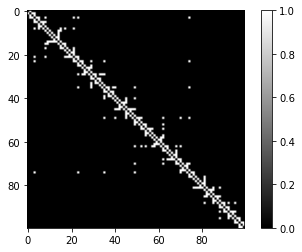

In [6]:
plt.imshow(horizontal, cmap='gray')
plt.colorbar();

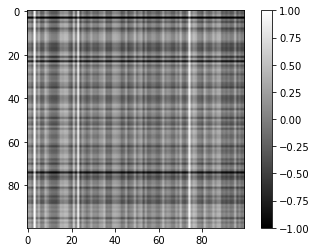

In [7]:
plt.imshow(gramian, cmap='gray')
plt.colorbar();

Vamos a desarrollar una algoritmo para pasar del Gramian Angular Difference Field a el Horizontal Visibility Graph. Con esto lo que se puede observar es que realmente el HVG es una parte de la matriz del GADF (con la correspondiente reinterpretación)

In [8]:
print(list(time_series))

[1.165899446339932, 1.2181194965310087, 0.5545771583408368, 3.482155291814484, 0.6748174091701985, 1.6721722823198755, 0.3464517932196374, 0.5055039087493035, 1.773237514629652, 1.2067574354106596, 0.433901958639111, 0.1374273937901926, 0.09490341668922131, 0.06348571841118275, 0.5844705889073176, 1.5611326695715675, 1.4436322491874345, 1.7206457513451932, 1.6223927352423646, 0.7023085510784798, 0.23977039582724416, 2.2592761815000157, 0.38810121348595683, 3.0842848107518726, 0.0740434173145908, 1.2674984335612007, 0.7199355411134486, 0.16450912658843397, 0.569206373712526, 1.3104465273296606, 0.5575058332632342, 0.6138639632174224, 0.4051770369763974, 1.0757847935809244, 1.1876172910317948, 1.7593804340831047, 0.2954230462767773, 0.4522160924468287, 0.25276185108778176, 1.3455707195036903, 1.4039126011303256, 1.2469166871470783, 0.9738103398765955, 0.14805715452160376, 0.3571471787662568, 1.3785866745305855, 0.07292801197546102, 0.4643714212532949, 0.6557845538592031, 1.75920373370264

In [9]:
def vgadf(m):
    ln = len(m)
    rm = [[0]*ln for _ in range(ln)]
    for i in range(ln):
        h = -2
        for j in range(i + 1, ln):
            if m[i][j] > 0 or m[i][j] == h:
                rm[i][j] = 1
                rm[j][i] = 1
                break
            elif m[i][j] < 0 and m[i][j] > h:
                rm[i][j] = 1
                rm[j][i] = 1
                h = m[i][j]
            elif m[i][j] == 0:
                rm[i][j] = i + 1 == j
                rm[j][i] = i + 1 == j
            elif m[i][j] < 0 and m[i][j] <= h:
                pass
    return rm

In [10]:
tgadf = vgadf(gramian)

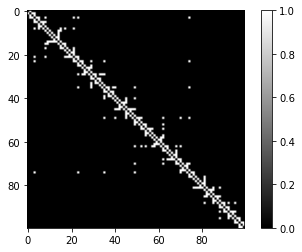

In [11]:
plt.imshow(tgadf, cmap='gray')
plt.colorbar();

In [12]:
sum(np.array(horizontal) - tgadf)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Problema: el GADF no tiene unicidad respecto a la resta. Si dos ángulos están muy juntos o muy separados, el seno de la diferencia puede ser el mismo. Esto no es un problema intrínseco del GADF, sino del intervalo que se está tomando para normalizar. Se propone la generación de GAF(I) dependiente de la normalización, además de extender esta familia a:
- Gramian Angular (sin) Difference Field: $sin(\phi_i-\phi_j)$ (~~ HVG) 
- Gramian Angular (cos) Difference Field: $cos(\phi_i-\phi_j)$ (~~ Matriz correlación)
- Gramian Angular (sin) Summation Field: $sin(\phi_i+\phi_j)$
- Gramian Angular (cos) Summation Field: $cos(\phi_i+\phi_j)$

Tanto el primero como el último son los habitualmente estudiados, los otros no tengo claro si se han planteado aún. En cualquier caso, la conjetura desde el momento actual es que el GAsDF([0, 1]) es un (H)VG con información sustancial sobre la información de no visibilidad. Se intentará explorar también la idea de el GAcDF es la extensión natural de la Gramian Matrix para estudiar la correlación en valor de las series temporales.

En la parte anterior se ha hecho una prueba para el GAsDF([0, 1]). Vamos a estudiar un experimento de 1000 pruebas

In [13]:
res = 0
for i in range(1000):
    time_series = np.abs(white_noise(100))
    horizontal = hvg(time_series)[1]
    gramian = gadf(time_series, I = [0, 1])
    tgadf = vgadf(gramian)
    res += sum(sum(np.abs(np.array(horizontal) - tgadf)))
print(res)

0


Para estos 1000 experimentos se comporta bien. Es demostrable esto como teorema facilmente.

Por otro lado, el GAcDF([0,1]) da lugar a una matriz de similitud, con la que se puede observar la relación "vectorial" de los elementos, si eso tiene sentido. Vamos a estudiarla.

In [14]:
from GAFLibrary import *

In [32]:
ts = np.abs(white_noise(10))

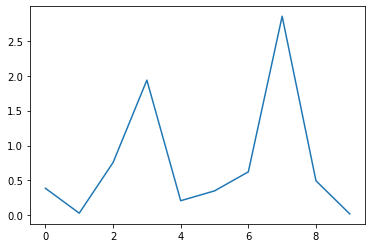

In [33]:
fig, ax = plt.subplots()
ax.plot(range(10), ts.values)

In [34]:
gdcf = GramianDifferenceField(f = np.cos, series = ts)

In [35]:
gdsf = GramianDifferenceField(series = ts)

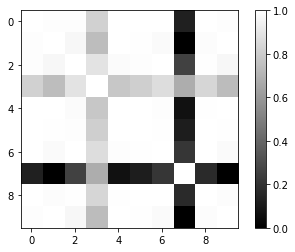

In [36]:
plt.imshow(gdcf, cmap='gray')
plt.colorbar();

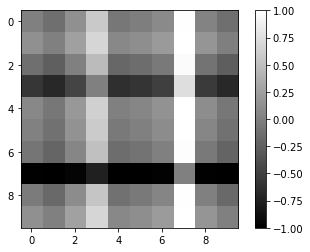

In [37]:
plt.imshow(gdsf, cmap='gray')
plt.colorbar();

Por jugar con esto, se puede estudiar también el Similarity Horizontal Visibility Graph, un grafo que conecta con los que "ve" más similitud

In [40]:
def vgadf2(m):
    ln = len(m)
    rm = [[0]*ln for _ in range(ln)]
    for i in range(ln - 1):
        h = -2
        for j in range(i + 1, ln):
            if j == i + 1:
                ini = m[i][j]
            if m[i][j] >= ini and j != i + 1:
                rm[i][j] = 1
                rm[j][i] = 1
                break
            if m[i][j] > h:
                rm[i][j] = 1
                rm[j][i] = 1
                h = m[i][j]
            if m[i][j] < h:
                pass
            
    return rm

In [41]:
vgadf2(gdcf)

[[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [44]:
g = nx.Graph(gdsf)

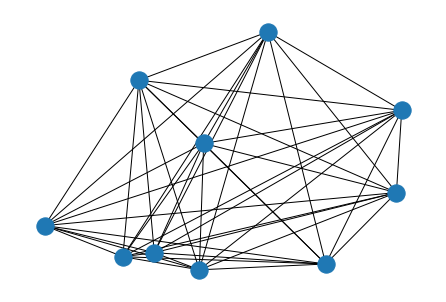

In [45]:
nx.draw(g)

In [52]:
vgadf(gdsf)

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [54]:
g = nx.Graph(np.array(vgadf(gdsf)))

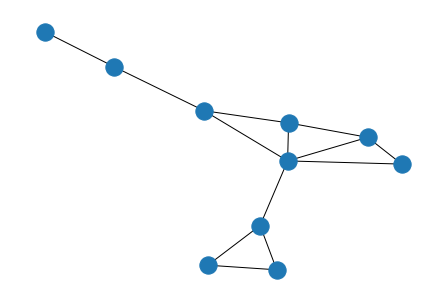

In [55]:
nx.draw(g)

In [48]:
horizontal = hvg(ts)[1]

In [50]:
horizontal

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [56]:
g = nx.Graph(np.array(horizontal))

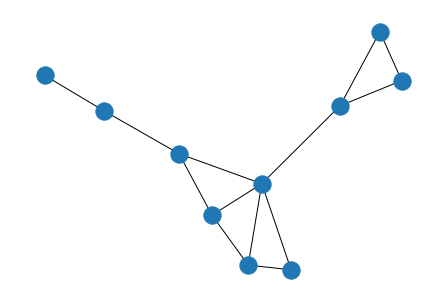

In [57]:
nx.draw(g)

In [58]:
g = nx.Graph(np.array(vgadf2(gdcf)))

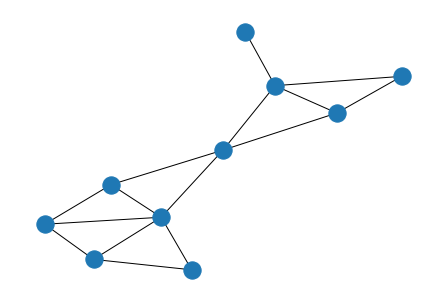

In [60]:
nx.draw(g)